## Importing libraries

In [ ]:
 pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.4 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12547 sha256=7817e018d2d6a31ec969ad45f0598e8f7e9186cf4a27f1f1c1a4c7f7a316441e
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import us
import seaborn as sns

## Data loading


I load the dataset and gather some basic information about it:
- 22 columns:
      ['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit']
- 9994 rows
- ~10% of each row has NaN values
- Mean and standard deviation of the numerical values

In [ ]:
# reading the data
store_data = pd.read_csv("/content/Sample - Superstore.csv")

In [ ]:
store_data.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
store_data.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1.0,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,1,NaN,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,2,3.0,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,3,4.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310
4,4,5.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164


In [ ]:
# understanding the numerical values in the dataset
store_data.describe()

,Unnamed: 0,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.00000,8995.000000
mean,4996.500000,4986.567426,55147.143413,230.864435,3.790773,0.15569,27.614049
std,2885.163629,2883.357953,32022.008929,624.590629,2.231843,0.20505,228.132397
min,0.000000,1.000000,1040.000000,0.444000,1.000000,0.00000,-6599.978000
25%,2498.250000,2491.500000,23223.000000,17.453000,2.000000,0.00000,1.734300
50%,4996.500000,4980.000000,55901.000000,54.792000,3.000000,0.20000,8.662000
75%,7494.750000,7475.500000,90004.000000,209.940000,5.000000,0.20000,29.364000
max,9993.000000,9994.000000,99301.000000,22638.480000,14.000000,0.80000,8399.976000


The high standard deviations for sales and profit columns indicate high variability. The presence of negative profits highlights cases where sales resulted in losses. The median values for sales and profit are significantly lower than their maximum values, which implies a skewed distribution.

In [ ]:
# Checking for null values
print(store_data.isnull().sum())

Unnamed: 0         0
Row ID           999
Order ID         999
Order Date       999
Ship Date        999
Ship Mode        999
Customer ID      999
Customer Name    999
Segment          999
Country          999
City             999
State            999
Postal Code      999
Region           999
Product ID       999
Category         999
Sub-Category     999
Product Name     999
Sales            999
Quantity         999
Discount         999
Profit           999
dtype: int64


In [ ]:
# creating a new column for to calculate shipping days
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'], format='%m/%d/%Y')
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'], format='%m/%d/%Y')
store_data['Shipping days'] = (store_data['Ship Date'] - store_data['Order Date']).dt.days

# store_data['Profit/product'] = (store_data['Profit']/store_data['Quantity'])
# store_data['Sales/product'] = (store_data['Sales']/store_data['Quantity'])

In [ ]:
# dropping 'Unnamed' and filling missing Row-IDs with the row number
store_data['Row ID'] = store_data['Unnamed: 0'] + 1
store_data.drop(columns=['Unnamed: 0'])

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping days
0,1,CA-2016-152156,2016-11-08,2016-11-11,NaN,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136,3.0
1,2,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820,3.0
2,3,NaN,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714,4.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,NaN,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310,7.0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,NaN,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,NaN,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,NaN,Furniture,NaN,NaN,25.2480,3.0,NaN,4.1028,2.0
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.0,15.6332,5.0
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.2,19.3932,5.0
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,NaN,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",NaN,4.0,0.0,13.3200,5.0


In [ ]:
print(store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     9994 non-null   int64         
 1   Row ID         9994 non-null   int64         
 2   Order ID       8995 non-null   object        
 3   Order Date     8995 non-null   datetime64[ns]
 4   Ship Date      8995 non-null   datetime64[ns]
 5   Ship Mode      8995 non-null   object        
 6   Customer ID    8995 non-null   object        
 7   Customer Name  8995 non-null   object        
 8   Segment        8995 non-null   object        
 9   Country        8995 non-null   object        
 10  City           8995 non-null   object        
 11  State          8995 non-null   object        
 12  Postal Code    8995 non-null   float64       
 13  Region         8995 non-null   object        
 14  Product ID     8995 non-null   object        
 15  Category       8995 n

## Exploratory Data Analysis

The dataset can be divided into 5 broad categories:
- **Shipping information**: Order ID, Order Date, Ship Date, Ship Mode, Shipping days (new column added)
- **Customer information**: Customer ID, Customer Name, Segment
- **Geographic information**: City, State, Postal Code, Region, Country
- **Product information**: Product ID, Category, Sub-Category, Product Name
- **Sales information**: Sales, Quantity, Discount, Profit

I want to explore patterns and check assumptions through visualizations.  

In [ ]:
# helper function to remove outliers using IQR
def remove_outliers(column):
  Q1 = store_data[column].quantile(0.25)
  Q3 = store_data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  filtered_store_data = store_data[(store_data[column] >= lower_bound) & (store_data[column] <= upper_bound)]

### Correlation

In [ ]:
numerical = store_data[['Sales', 'Quantity', 'Discount','Profit', 'Shipping days']]

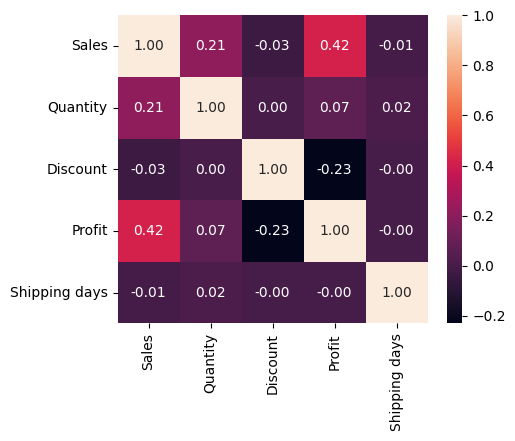

In [ ]:
# Correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(numerical.corr(), annot=True, fmt=".2f")
plt.show()

For the numerical data, I analyzed the correlations between the features.
- Sales and profits are moderately correlated (0.42) which implies higher sales lead to higher profits.
- Discount and Profit are negatively correlated (-0.23). This indicates that higher discounts might be reducing profit margins.
- Sales and quantity are positively correlated (0.21). This indicates that higher sales are somewhat associated with larger quantities sold.
- All other variables suggest very low correlation indicating little to no direct impact.

### Shipping information
- I want to understand how much shipping time each shipping mode takes.
- Is there a shipping mode that is prefered/the majority?
- Do different customer segments prefer different shipping modes?
- Are shorter shipping times correlated with higher sales?



In [ ]:
store_data['Shipping days'].value_counts()

Shipping days
4.0    2258
5.0    1752
2.0    1079
6.0     986
3.0     823
7.0     502
0.0     426
1.0     283
Name: count, dtype: int64

In [ ]:
store_data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5357
Second Class      1747
First Class       1389
Same Day           502
Name: count, dtype: int64

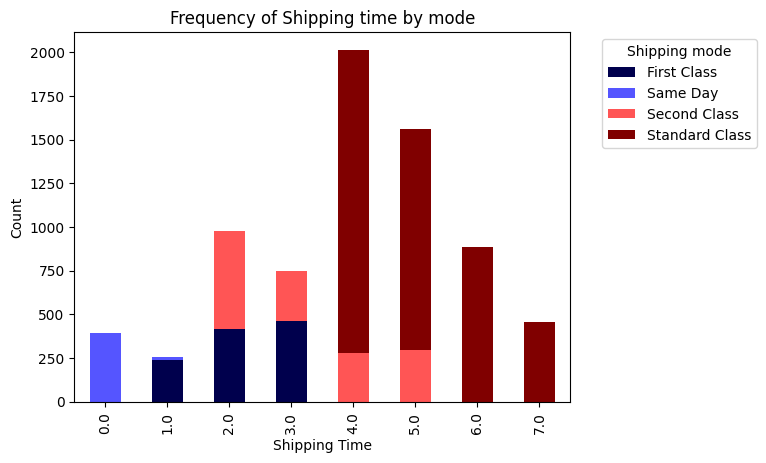

In [ ]:
# Shipping time per shipping mode
shipping_mode_days = store_data.groupby(['Shipping days', 'Ship Mode']).size().unstack()
shipping_mode_days.plot(kind='bar', stacked=True, colormap='seismic')
plt.title('Frequency of Shipping time by mode')
plt.xlabel('Shipping Time')
plt.ylabel('Count')
plt.legend(title='Shipping mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Standard Class is the most frequently used shipping mode. It peaks at 4 days and remains relatively high after suggesting the delivery time is 4-7 days. First Class and Second Class are faster with First Class peaking at 2 days, whereas Second Class peaks at 3 days.

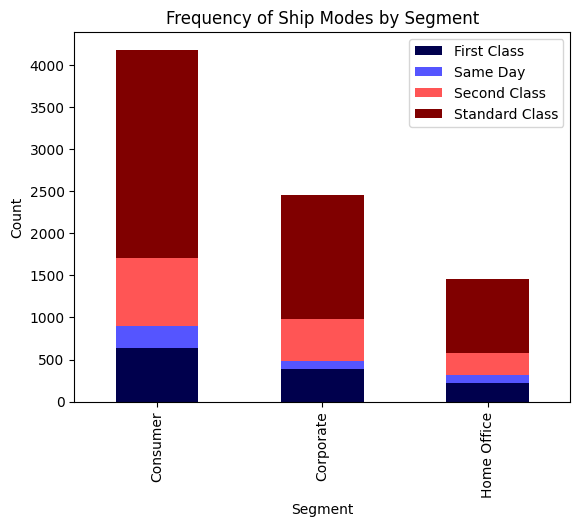

In [ ]:
# Shipping mode w.r.t segment
segment_shipping_freq = store_data.groupby(['Segment', 'Ship Mode']).size().unstack()
segment_shipping_freq.plot(kind='bar', stacked=True, colormap='seismic')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Frequency of Ship Modes by Segment')
plt.legend()
plt.show()

All modes are used with similar proportions for each customer segment.

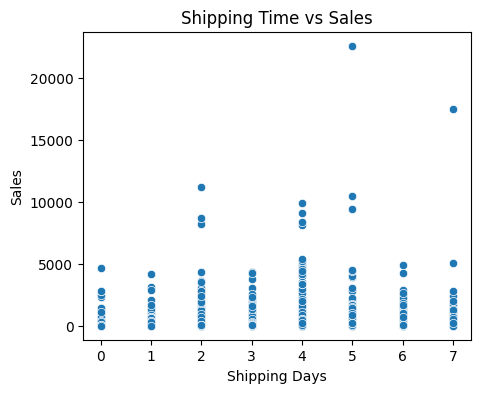

In [ ]:
# Sales and shipping time
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Shipping days', y='Sales', data=store_data)
plt.title('Shipping Time vs Sales')
plt.xlabel('Shipping Days')
plt.ylabel('Sales')
plt.show()

This graph supports the negligible correlation coefficient between sales and shipping days (-0.1) indicating that shipping time does not directly impact sales.

In [ ]:
remove_outliers("Sales")

### Geographic Information
- Which regions generate the most sales and profits?
- How do sales and profit margins vary across different states?



In [ ]:
print(store_data['Country'].value_counts()) # we can remove this column since the store is clearly based in the US

Country
United States    8995
Name: count, dtype: int64


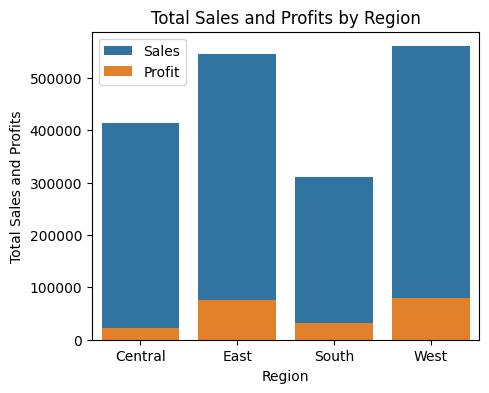

In [ ]:
# Aggregate sales and profits by region
region_data = store_data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

# Plotting total sales and profits by region
plt.figure(figsize=(5, 4))
sns.barplot(x='Region', y='Sales', data=region_data, label='Sales')
sns.barplot(x='Region', y='Profit', data=region_data, label='Profit')

plt.title('Total Sales and Profits by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales and Profits')
plt.legend()
plt.show()

The West and East contribute the most to both sales and profit.

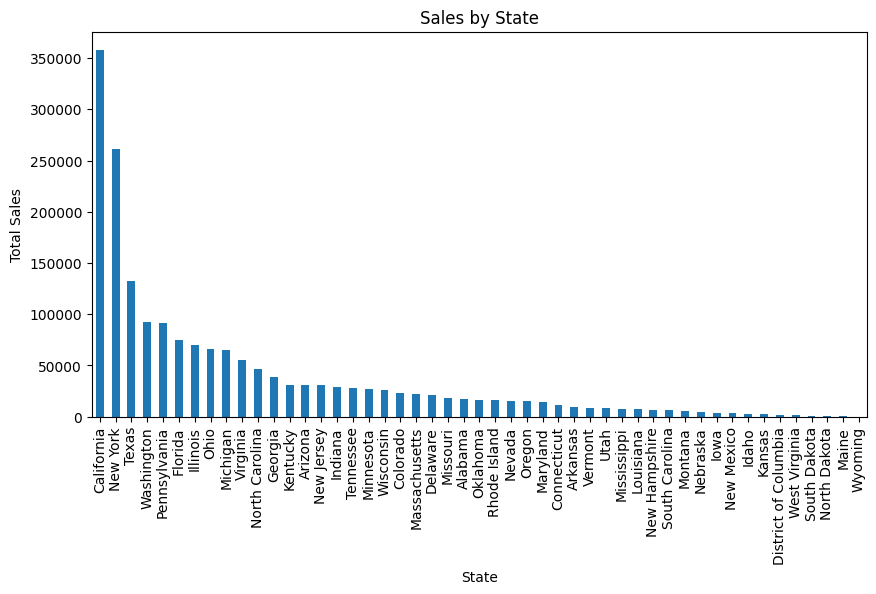

In [ ]:
# State Distribution of Sales
plt.figure(figsize=(10, 5))
plt.title('Sales by State')
state_sales = store_data.groupby('State')['Sales'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

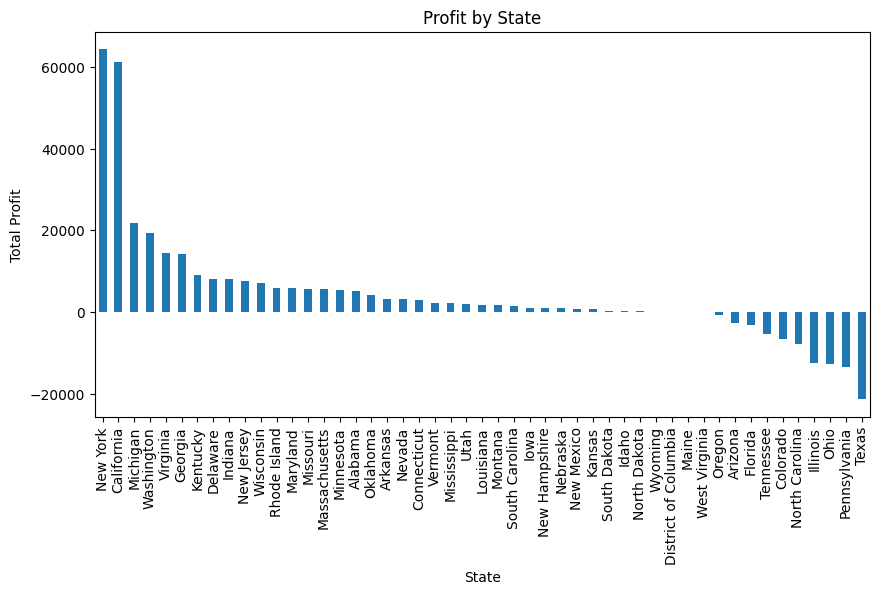

In [ ]:
# State Distribution of Profits
plt.figure(figsize=(10, 5))
plt.title('Profit by State')
state_sales = store_data.groupby('State')['Profit'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate total sales and total profits for normalization
total_sales = store_data['Sales'].sum()
total_profits = store_data['Profit'].sum()
state_summary = store_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()

state_summary['Sales %'] = (state_summary['Sales'] / total_sales) * 100
state_summary['Profit %'] = (state_summary['Profit'] / total_profits) * 100

top_sales_states = state_summary.sort_values(by='Sales', ascending=False).head(10)
top_profit_states = state_summary.sort_values(by='Profit', ascending=False).head(10)

print("Top 10 States by Sales Contribution (%):")
print(top_sales_states[['State', 'Sales', 'Sales %']])
print("\nTop 10 States by Profit Contribution (%):")
print(top_profit_states[['State', 'Profit', 'Profit %']])

Top 10 States by Sales Contribution (%):
           State        Sales    Sales %
3     California  357765.7435  17.228226
30      New York  260841.8070  12.560849
41         Texas  132656.4928   6.388079
45    Washington   92140.6440   4.437037
36  Pennsylvania   91208.8380   4.392166
8        Florida   74902.6825   3.606942
11      Illinois   70010.5130   3.371359
33          Ohio   66402.5290   3.197617
20      Michigan   65325.3100   3.145743
44      Virginia   55360.0900   2.665868

Top 10 States by Profit Contribution (%):
         State      Profit   Profit %
30    New York  64285.8122  25.881169
3   California  61186.8548  24.633543
20    Michigan  21820.2317   8.784724
45  Washington  19466.4317   7.837095
44    Virginia  14578.3343   5.869169
9      Georgia  14108.9548   5.680199
15    Kentucky   8997.7428   3.622449
6     Delaware   8125.8936   3.271447
12     Indiana   8026.4598   3.231415
28  New Jersey   7617.1683   3.066636


- States like Georgia, Kentucky, Delaware, Indiana and NJ have a stronger profit contribution compared to their sales, indicating efficient operations or favorable market conditions.
- States like California, NY, Washington align closely in their sales and profit contributions, reflecting consistent market performance.
- One interesting thing to note is states like Texas, Pennsylvania, Illinois have one of the highest sales but also have the highest losses.

### Product Information
- Is there a category that is preferred?
- What does the distribution of sub-categories look like?
- Which products or sub-categories are bestsellers and why?

In [ ]:
store_data['Sub-Category'].value_counts()

Sub-Category
Binders        1370
Paper          1233
Furnishings     855
Phones          795
Storage         763
Art             717
Accessories     700
Chairs          560
Appliances      417
Labels          329
Tables          287
Envelopes       225
Bookcases       208
Fasteners       198
Supplies        171
Machines        104
Copiers          63
Name: count, dtype: int64

In [ ]:
store_data['Category'].value_counts()

Category
Office Supplies    5423
Furniture          1909
Technology         1663
Name: count, dtype: int64

Office supplies are the most popular category and accounts for 60% of the total category count.

<Figure size 1400x800 with 0 Axes>

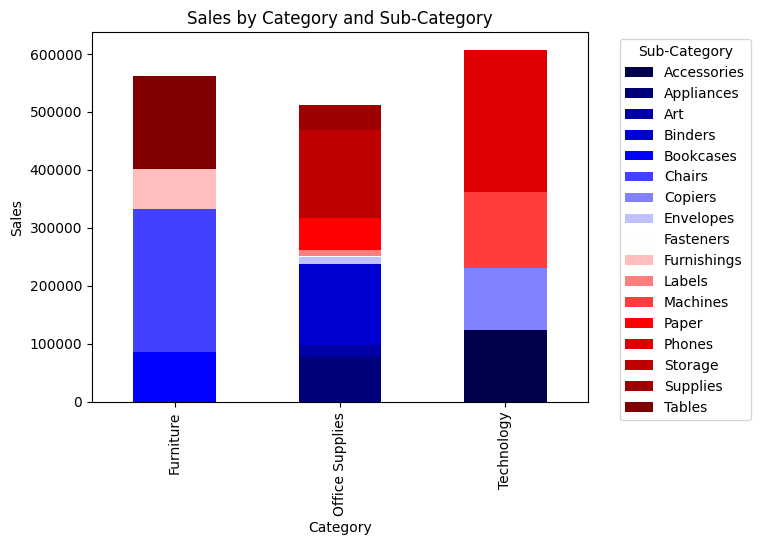

In [ ]:
plt.figure(figsize=(14, 8))
category_grouped = store_data.groupby(['Category', 'Sub-Category'])['Sales'].sum().unstack()
category_grouped.plot(kind='bar', stacked=True, colormap='seismic')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1400x800 with 0 Axes>

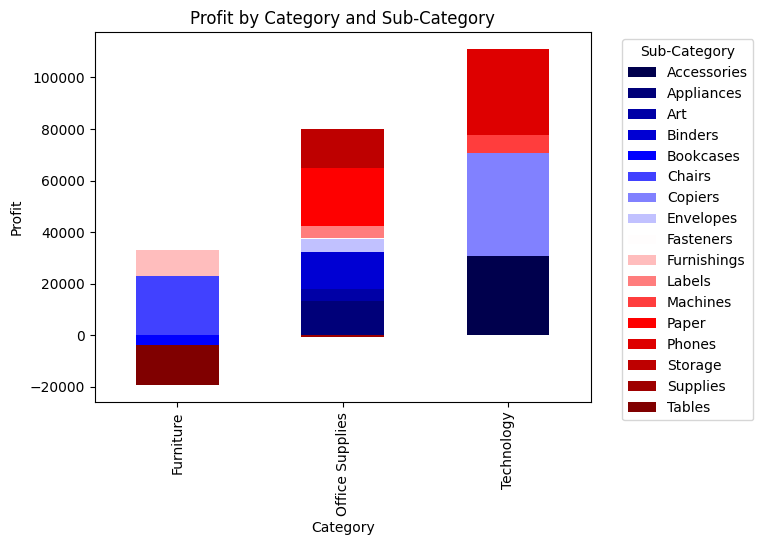

In [ ]:
plt.figure(figsize=(14, 8))
category_grouped = store_data.groupby(['Category', 'Sub-Category'])['Profit'].sum().unstack()
category_grouped.plot(kind='bar', stacked=True, colormap='seismic')
plt.title('Profit by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
category_grouped

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,-3876.1641,22947.4761,NaN,NaN,NaN,10237.7074,NaN,NaN,NaN,NaN,NaN,NaN,-15419.585
Office Supplies,NaN,13224.8622,4816.9922,14317.7653,NaN,NaN,NaN,4847.8021,689.7888,NaN,4376.8866,NaN,22764.078,NaN,15140.335,-772.5771,NaN
Technology,30837.4295,NaN,NaN,NaN,NaN,NaN,39725.9259,NaN,NaN,NaN,NaN,6952.916,NaN,33501.5297,NaN,NaN,NaN


The "Furniture" category shows a high number of sales and good profits in "Chairs" but losses in "Tables".  
The "Technology" category has the highest sales and profits which makes sense because they have higher unit prices and are in demand.
The "Office Supplies" category contribute the least to sales but sub-categories like "Storage" and "Appliances" show reasonable profit contributions. This makes sense because most of these items are cost effective.

<ipython-input-30-e86e55805e3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Sub-Category', data=sub_cat_sales, palette='viridis')


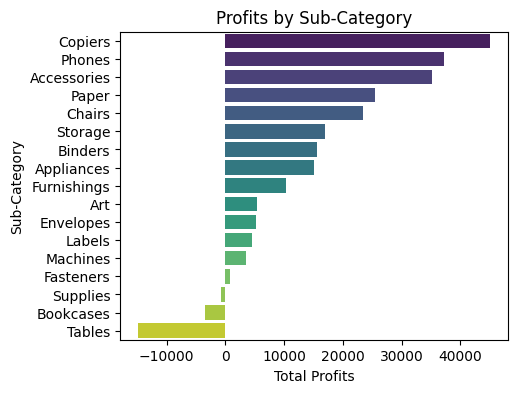

In [ ]:
# Aggregate sales by sub-category
sub_cat_sales = store_data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(5, 4))
sns.barplot(x='Profit', y='Sub-Category', data=sub_cat_sales, palette='viridis')
plt.title('Profits by Sub-Category')
plt.xlabel('Total Profits')
plt.ylabel('Sub-Category')
plt.show()

### Sales information
- Are there any seasonal trends with sales?
- How do discounts impact sales and profitability?
- What is the relationship between quantity sold and profit?

I decided to not remove outliers because they might provide useful information about the store (like seasonal spikes, bulk orders etc.)

<Axes: xlabel='Profit', ylabel='Count'>

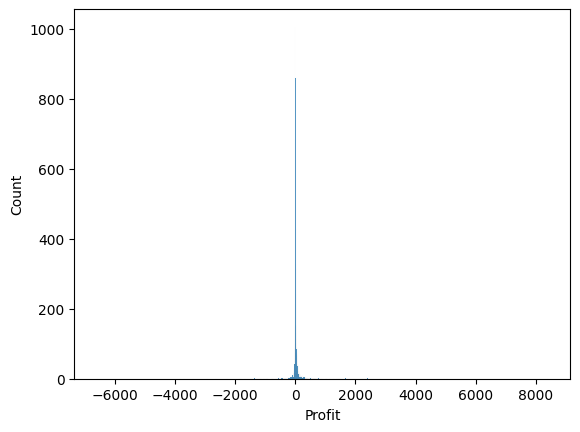

In [ ]:
sns.histplot(data=store_data, x = "Profit")

In [ ]:
remove_outliers("Profit")

<Axes: xlabel='Quantity', ylabel='Count'>

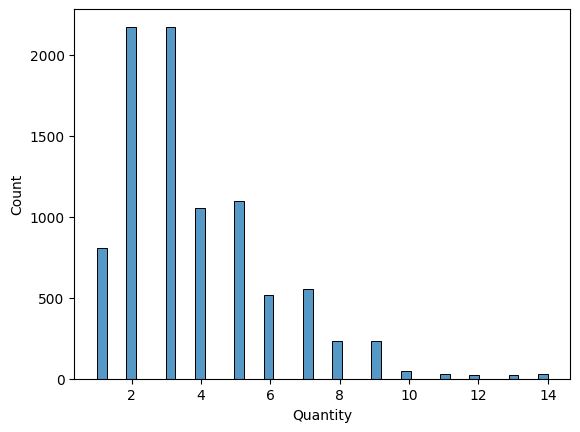

In [ ]:
sns.histplot(data=store_data, x = "Quantity")

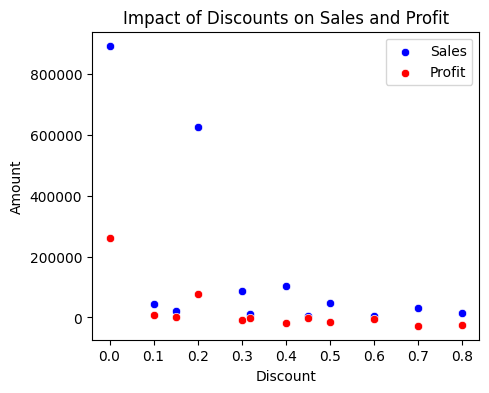

In [ ]:
# Aggregate sales and profit by discount
discount_data = store_data.groupby('Discount')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(5, 4))
sns.scatterplot(x='Discount', y='Sales', data=discount_data, color='blue', label='Sales')
sns.scatterplot(x='Discount', y='Profit', data=discount_data, color='red', label='Profit')
plt.title('Impact of Discounts on Sales and Profit')
plt.xlabel('Discount')
plt.ylabel('Amount')
plt.legend()
plt.show()

Little to no discount (0 - 0.2) lead to higher profits and sales. As the discount increases, profit and sales drop significantly.

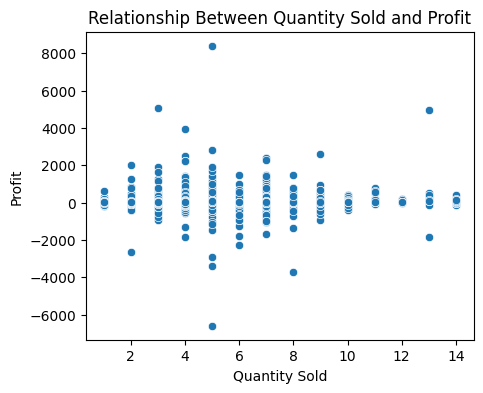

In [ ]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Quantity', y='Profit', data=store_data)
plt.title('Relationship Between Quantity Sold and Profit')
plt.xlabel('Quantity Sold')
plt.ylabel('Profit')
plt.show()

There's a broad spread in profit levels across different quantities sold, with no clear linear relationship indicating that higher quantities directly lead to higher profits. This is supported by the correlation matrix shown above.

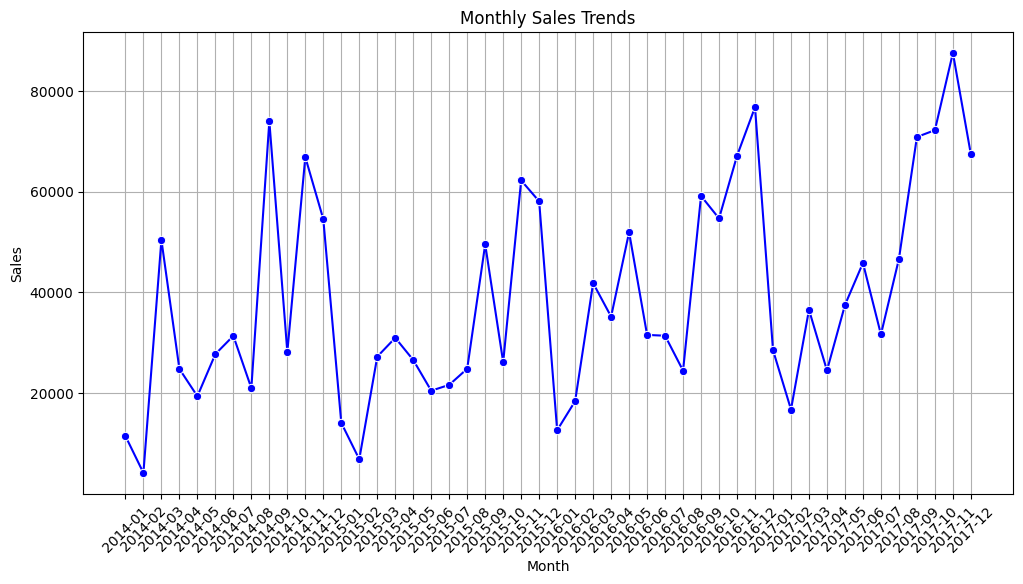

In [ ]:
# Extract year and month from the order date for grouping
store_data['Year-Month'] = store_data['Order Date'].dt.to_period('M')

# Aggregate sales by year and month
monthly_sales = store_data.groupby('Year-Month')['Sales'].sum().reset_index()

# Convert 'Year-Month' to string for plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year-Month', y='Sales', data=monthly_sales, marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.grid(True)
plt.show()


There appears to be an upward trend in sales over the years, with peaks becoming generally higher towards the later years in the graph. There are also noticeable seasonal peaks, especially from August-October.

## Imputing data

I check for null values in the dataset and nearly 10% of each column is NaN. However, certain categorical variables are dependent on each other.

Firstly, I use a publically available dataset that consists of zipcodes, cities, and states.
I do the following steps to try and fill in missing values for categorical variables:
1. City can be determined using Postal Code.
2. State can be determined using City

I create mappings from zipcodes to cities and states to fill in the missing information

In [ ]:
zipcode_database = pd.read_csv("zip_code_database.csv", header=0)
zipcode_database = zipcode_database[["zip", "primary_city", "state"]]
zipcode_database["state"] = zipcode_database["state"].apply(lambda x: us.states.lookup(x).name if us.states.lookup(x) else x)

city_map = zipcode_database.set_index('zip')['primary_city']
state_map = zipcode_database.set_index('zip')['state']
store_data['City'] = store_data['City'].fillna(store_data['Postal Code'].map(city_map))
store_data['State'] = store_data['State'].fillna(store_data['Postal Code'].map(state_map))

In [ ]:
print(store_data.isnull().sum())

Unnamed: 0          0
Row ID              0
Order ID          999
Order Date        999
Ship Date         999
Ship Mode         999
Customer ID       999
Customer Name     999
Segment           999
Country           999
City               98
State             116
Postal Code       999
Region            999
Product ID        999
Category          999
Sub-Category      999
Product Name      999
Sales             999
Quantity          999
Discount          999
Profit            999
Shipping days    1885
Year-Month        999
dtype: int64


Next, I fill in missing values for category using the sub-category column. Since there are only 17 sub-categories and 3 categories, we can easily determine which sub-category belongs to which category using a dictionary that maps the subcategories (keys) to catgories (values).

In [ ]:
store_data = store_data[['Ship Mode', 'Segment',
       'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount','Profit', 'Shipping days']]

In [ ]:
store_data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', nan, 'Binders', 'Appliances', 'Phones',
       'Accessories', 'Envelopes', 'Paper', 'Fasteners', 'Supplies',
       'Machines', 'Copiers'], dtype=object)

In [ ]:
store_data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology', nan], dtype=object)

In [ ]:
null_category = store_data[pd.isna(store_data['Category'])]
null_category = store_data[store_data['Category'].isna()]
null_category = null_category[['Category','Sub-Category']]

In [ ]:
category_dict = {"Bookcases": "Furniture",
                      "Chairs": "Furniture",
                      "Labels": "Office Supplies",
                      "Tables": "Furniture",
                      "Storage": "Furniture",
                      "Furnishings": "Furniture",
                      "Binders": "Office Supplies",
                      "Appliances": "Technology",
                      "Phones": "Technology",
                      "Envelopes": "Office Supplies",
                      "Paper": "Office Supplies",
                      "Fasteners": "Furniture",
                      "Copiers" : "Office Supplies",
                      "Machines": "Technology"}

In [ ]:
def impute_cat_from_subcat(row):
    # Check if the state is NaN and the city is not NaN
    if pd.isnull(row['Category']) and pd.notnull(row['Sub-Category']):
        # Check if the city exists in the dictionary
        if row['Sub-Category'] in category_dict:
            # Return the corresponding state from the dictionary
            return category_dict[row['Sub-Category']]
    # Return the original state if no conditions are met
    return row['Category']

In [ ]:
print(store_data.isnull().sum())

Ship Mode         999
Segment           999
City               98
State             116
Postal Code       999
Region            999
Category          999
Sub-Category      999
Sales             999
Quantity          999
Discount          999
Profit            999
Shipping days    1885
dtype: int64


In [ ]:
store_data['Sub-Category'].value_counts()

Sub-Category
Binders        1370
Paper          1233
Furnishings     855
Phones          795
Storage         763
Art             717
Accessories     700
Chairs          560
Appliances      417
Labels          329
Tables          287
Envelopes       225
Bookcases       208
Fasteners       198
Supplies        171
Machines        104
Copiers          63
Name: count, dtype: int64

In [ ]:
def most_common_subcat(x):
    return x.mode()[0] if not x.mode().empty else None

# Create a mapping of Category to the most common Sub-Category, excluding NaN categories
category_to_subcategory = store_data.dropna(subset=['Category']).groupby('Category')['Sub-Category'].apply(most_common_subcat)

# Fill missing values in 'Sub-Category' only where 'Category' is not NaN
store_data['Sub-Category'] = store_data.apply(
    lambda row: category_to_subcategory.get(row['Category'], row['Sub-Category']) if pd.notna(row['Category']) else row['Sub-Category'],
    axis=1
)

In [ ]:
print(store_data.isnull().sum())

Ship Mode         999
Segment           999
City               98
State             116
Postal Code       999
Region            999
Category          999
Sub-Category      111
Sales             999
Quantity          999
Discount          999
Profit            999
Shipping days    1885
dtype: int64


In [ ]:
mapped_categories = store_data['Sub-Category'].map(category_dict)
store_data['Category'] = store_data['Category'].fillna(mapped_categories)
print(store_data.isnull().sum())

Ship Mode         999
Segment           999
City               98
State             116
Postal Code       999
Region            999
Category          274
Sub-Category      111
Sales             999
Quantity          999
Discount          999
Profit            999
Shipping days    1885
dtype: int64


In [ ]:
store_data['Quantity'].value_counts()

Quantity
2.0     2175
3.0     2172
5.0     1097
4.0     1055
1.0      807
7.0      555
6.0      517
8.0      232
9.0      231
10.0      48
11.0      32
14.0      27
13.0      24
12.0      23
Name: count, dtype: int64

In [ ]:
store_data.groupby('Category')['Quantity'].sum()

Category
Furniture           7549.0
Office Supplies    19498.0
Technology          6052.0
Name: Quantity, dtype: float64

Given that the quantity varies significantly across different categories, I wanted to use use category-specific statistics to impute values in Quantity. However, the mean and median for all categories is ~3. I will use the median to impute the data

In [ ]:
mean = store_data.groupby('Category')['Quantity'].mean()
print(mean)
# Handle missing 'Category' in lambda
store_data['Quantity'] = store_data.apply(
    lambda row: mean[row['Category']] if pd.notna(row['Category']) and pd.isnull(row['Quantity']) else row['Quantity'],
    axis=1)

Category
Furniture          3.831980
Office Supplies    3.770644
Technology         3.777778
Name: Quantity, dtype: float64


In [ ]:
mean = store_data.groupby('Category')['Discount'].mean()
print(mean)
median = store_data.groupby('Category')['Discount'].median()
print(median)

Category
Furniture          0.169314
Office Supplies    0.160159
Technology         0.133639
Name: Discount, dtype: float64
Category
Furniture          0.2
Office Supplies    0.0
Technology         0.2
Name: Discount, dtype: float64


The mean for office supplies must be affected by extreme values. Therefore, I will use medians to impute the missing values for Discount.

In [ ]:
store_data['Discount'] = store_data.apply(
    lambda row: median[row['Category']] if pd.notna(row['Category']) and pd.isnull(row['Discount']) else row['Discount'],
    axis=1)

In [ ]:
mean = store_data.groupby('Category')['Profit'].mean()
print(mean)
median = store_data.groupby('Category')['Profit'].median()
print(median)

Category
Furniture          10.348815
Office Supplies    19.501471
Technology         74.045992
Name: Profit, dtype: float64
Category
Furniture           7.8036
Office Supplies     6.8824
Technology         25.1916
Name: Profit, dtype: float64


Since the data is skewed, the median better represents the "typical" profit value without being overly influenced by extreme outliers.

In [ ]:
# Fill missing values in 'Profit' based on the median of the respective category
store_data['Profit'] = store_data.apply(
    lambda row: median[row['Category']] if pd.notna(row['Category']) and pd.isnull(row['Profit']) else row['Profit'],
    axis=1)

In [ ]:
mean = store_data.groupby('Category')['Sales'].mean()
print(mean, "\n")
median = store_data.groupby('Category')['Sales'].median()
print(median)

# Fill missing values in 'Profit' based on the median of the respective category
store_data['Sales'] = store_data.apply(
    lambda row: median[row['Category']] if pd.notna(row['Category']) and pd.isnull(row['Sales']) else row['Sales'],
    axis=1)

Category
Furniture          353.313193
Office Supplies    118.669326
Technology         447.255590
Name: Sales, dtype: float64 

Category
Furniture          182.745
Office Supplies     26.968
Technology         167.970
Name: Sales, dtype: float64


The difference between mean and median values indicates that the data is skewed to the right. I will use the median to impute the data since it is less sensitive to outliers.

In [ ]:
# Use groupby and mode to determine the most common Region for each State
state_region_mapping = store_data.dropna(subset=['Region']).groupby('State')['Region'].agg(lambda x: pd.Series.mode(x)[0]).to_dict()

# Fill missing Region values using the mapped values from the State
store_data['Region'] = store_data.apply(lambda row: state_region_mapping.get(row['State'], row['Region']) if pd.isnull(row['Region']) else row['Region'], axis=1)

In [ ]:
# zipcode_database = pd.read_csv("zip_code_database.csv", header=0)
# zipcode_database = zipcode_database[["zip", "primary_city", "state"]]
# zipcode_database["state"] = zipcode_database["state"].apply(lambda x: us.states.lookup(x).name if us.states.lookup(x) else x)
postal_dict = zipcode_database.set_index(['primary_city', 'state'])['zip'].to_dict()

store_data['Postal Code'] = store_data.apply(
    lambda row: postal_dict.get((row['City'], row['State'])) if pd.isnull(row['Postal Code']) else row['Postal Code'],
    axis=1)

I use mode imputation for Ship Mode, Segment, and Shipping days since it is representative of the most common category. I think this also helps me maintain consistency with the data because in this case it reflects existing patterns in the data.

In [ ]:
store_data['Ship Mode'].value_counts()
store_data['Segment'].value_counts()
store_data['Shipping days'].value_counts()

Shipping days
4.0    2258
5.0    1752
2.0    1079
6.0     986
3.0     823
7.0     502
0.0     426
1.0     283
Name: count, dtype: int64

In [ ]:
# Calculate the mode for the necessary columns
ship_mode_mode = store_data['Ship Mode'].mode()[0]
segment_mode = store_data['Segment'].mode()[0]
shipping_days_mode = store_data['Shipping days'].mode()[0]

# Fill missing values with the mode
store_data['Ship Mode'].fillna(ship_mode_mode, inplace=True)
store_data['Segment'].fillna(segment_mode, inplace=True)
store_data['Shipping days'].fillna(shipping_days_mode, inplace=True)

print(store_data.isnull().sum())

Ship Mode          0
Segment            0
City              98
State            116
Postal Code      285
Region            18
Category         274
Sub-Category     111
Sales             32
Quantity          22
Discount          28
Profit            32
Shipping days      0
dtype: int64


In [ ]:
print(store_data.isnull().sum())

Ship Mode          0
Segment            0
City              98
State            116
Postal Code      285
Region            18
Category         274
Sub-Category     111
Sales             32
Quantity          22
Discount          28
Profit            32
Shipping days      0
dtype: int64


In [ ]:
store_data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping days
0,Standard Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Furnishings,182.7450,2.0,0.0,41.9136,3.0
1,Second Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Furnishings,731.9400,3.0,0.0,219.5820,3.0
2,Second Class,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Binders,14.6200,2.0,0.0,6.8714,4.0
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Furnishings,957.5775,5.0,0.2,-383.0310,7.0
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Binders,22.3680,2.0,0.2,2.5164,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,NaN,NaN,South,Furniture,Furnishings,25.2480,3.0,0.2,4.1028,2.0
9990,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Furniture,Furnishings,91.9600,2.0,0.0,15.6332,5.0
9991,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Technology,Phones,258.5760,2.0,0.2,19.3932,5.0
9992,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Office Supplies,Binders,26.9680,4.0,0.0,13.3200,5.0


## Latitude and Longitude

Next, I am preparing to use this data for my machine learning model. For that, I need information about longitude and latitude which will be extracted using the zipcode.

In [ ]:
long_lat = pd.read_csv("zip_code_database.csv", usecols=["zip", "latitude", "longitude"])
long_lat['zip'] = long_lat['zip'].astype(float)
store_data['Postal Code'] = store_data['Postal Code'].astype(float)

In [ ]:
store_data = store_data.merge(long_lat, left_on='Postal Code', right_on='zip', how='left')

In [ ]:
store_data.drop('zip', axis=1, inplace=True)

In [ ]:
store_data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping days,latitude,longitude
0,Standard Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Furnishings,182.7450,2.0,0.0,41.9136,3.0,37.83,-87.58
1,Second Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Furnishings,731.9400,3.0,0.0,219.5820,3.0,37.83,-87.58
2,Second Class,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Binders,14.6200,2.0,0.0,6.8714,4.0,34.06,-118.35
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Furnishings,957.5775,5.0,0.2,-383.0310,7.0,26.14,-80.17
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Binders,22.3680,2.0,0.2,2.5164,7.0,26.14,-80.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,NaN,NaN,South,Furniture,Furnishings,25.2480,3.0,0.2,4.1028,2.0,NaN,NaN
9990,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Furniture,Furnishings,91.9600,2.0,0.0,15.6332,5.0,33.64,-117.91
9991,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Technology,Phones,258.5760,2.0,0.2,19.3932,5.0,33.64,-117.91
9992,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Office Supplies,Binders,26.9680,4.0,0.0,13.3200,5.0,33.64,-117.91


## Cleaned data

In [ ]:
print(store_data.isnull().sum())

Ship Mode          0
Segment            0
City              98
State            116
Postal Code      285
Region            18
Category         274
Sub-Category     111
Sales             32
Quantity          22
Discount          28
Profit            32
Shipping days      0
latitude         285
longitude        285
dtype: int64


Now that as much of the missing information that could be filled has been filled, we can drop the remaining NaN values without compromising the initial size of the dataset by too much. This new dataset will be used for my machine learning model.

In [ ]:
store_data.dropna(inplace=True)
print(store_data.isnull().sum())
store_data.to_csv('cleaned_store_data.csv', index=False)

Ship Mode        0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping days    0
latitude         0
longitude        0
dtype: int64


In [ ]:
cleaned_data = pd.read_csv("/content/cleaned_store_data.csv")
cleaned_data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping days,latitude,longitude
0,Standard Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Furnishings,182.7450,2.0,0.0,41.9136,3.0,37.83,-87.58
1,Second Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Furnishings,731.9400,3.0,0.0,219.5820,3.0,37.83,-87.58
2,Second Class,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Binders,14.6200,2.0,0.0,6.8714,4.0,34.06,-118.35
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Furnishings,957.5775,5.0,0.2,-383.0310,7.0,26.14,-80.17
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Binders,22.3680,2.0,0.2,2.5164,7.0,26.14,-80.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9437,Standard Class,Consumer,Athens,Georgia,30605.0,South,Technology,Phones,206.1000,5.0,0.0,55.6470,4.0,33.91,-83.32
9438,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Furniture,Furnishings,91.9600,2.0,0.0,15.6332,5.0,33.64,-117.91
9439,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Technology,Phones,258.5760,2.0,0.2,19.3932,5.0,33.64,-117.91
9440,Standard Class,Consumer,Costa Mesa,California,92627.0,West,Office Supplies,Binders,26.9680,4.0,0.0,13.3200,5.0,33.64,-117.91
